# Neural Net Classifier vs Logistic Regression

Recall the dataset (Framingham_dataset_mod.xlsx) from class 10, which represents data from the Framingham Heart Study, Levy (1999) National Heart Lung and Blood Institute, Center for Bio-Medical Communication. Researchers are interested in using the data to predict coronary heart disease (CHD).

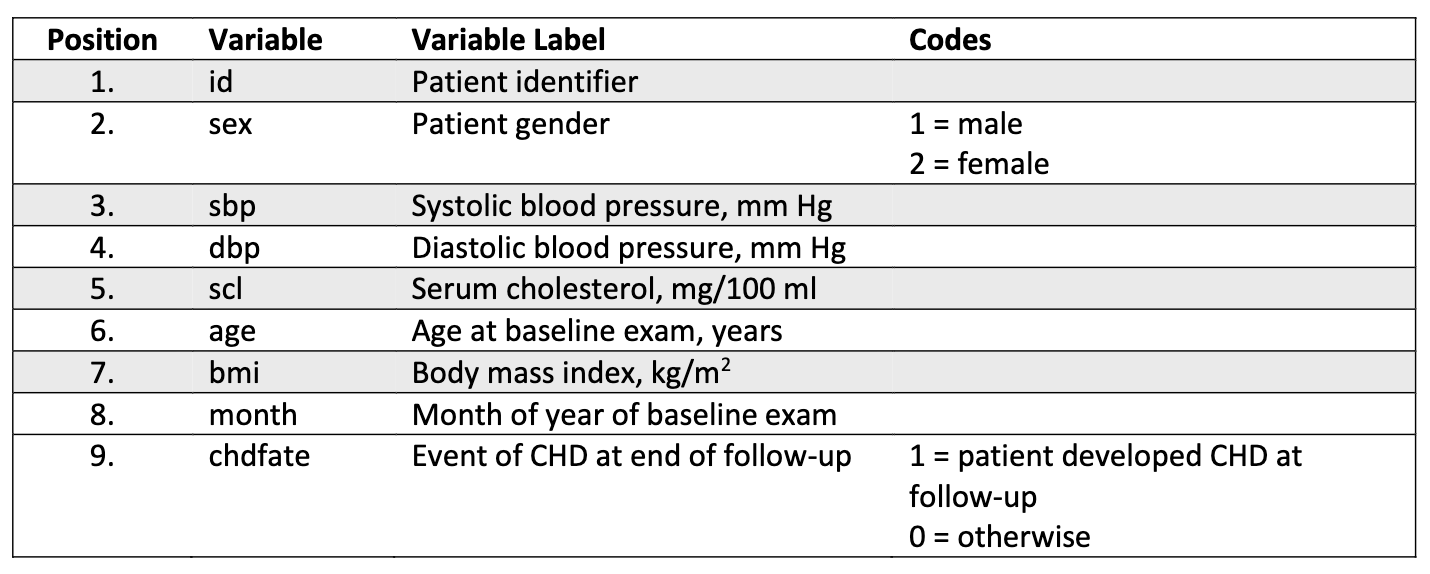

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

**1. Import the data and make the same changes to the data you made in exercise 5 (solutions are posted to Canvas for exercise 5)**

In [15]:
df = pd.read_excel('framingham_dataset_mod.xlsx')
df = df.dropna()

df.describe()

,id,sex,sbp,dbp,scl,age,bmi,month,chdfate
count,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000
mean,2349.907177,1.561882,132.783627,82.553287,228.281478,46.028363,25.627095,6.370004,0.314353
std,1357.546187,0.496209,22.797151,12.732027,44.569250,8.493892,4.080944,3.685371,0.464308
min,1.000000,1.000000,80.000000,40.000000,115.000000,30.000000,16.200000,1.000000,0.000000
25%,1172.250000,1.000000,116.000000,74.000000,197.000000,39.000000,22.900000,3.000000,0.000000
50%,2352.500000,2.000000,130.000000,80.000000,225.000000,45.000000,25.200000,6.000000,0.000000
75%,3525.750000,2.000000,144.000000,90.000000,255.000000,53.000000,28.000000,10.000000,1.000000
max,4699.000000,2.000000,270.000000,148.000000,568.000000,66.000000,57.600000,12.000000,1.000000


In [14]:
df['winter'] = np.where((df.month == 12) | (df.month < 3), 1, 0)
df['spring'] = np.where((df.month > 3) & (df.month < 6), 1, 0)
df['summer'] = np.where((df.month > 5) & (df.month < 9), 1, 0)
df['fall'] = np.where((df.month > 8) & (df.month < 12), 1, 0)
df['log_bmi'] = np.log(df.bmi)

df

,id,sex,sbp,dbp,scl,age,bmi,month,chdfate,winter,spring,summer,autumn,log_bmi,fall
0,2642,1,120,80,267.0,55,25.0,8,1,0,0,1,0,3.218876,0
1,4627,1,130,78,192.0,53,28.4,12,1,1,0,0,0,3.346389,0
2,2568,1,144,90,207.0,61,25.1,8,1,0,0,1,0,3.222868,0
3,4192,1,92,66,231.0,48,26.2,11,1,0,0,0,1,3.265759,1
4,3977,1,162,98,271.0,39,28.4,11,1,0,0,0,1,3.346389,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1805,2,130,84,175.0,35,27.7,4,0,0,1,0,0,3.321432,0
4691,1976,2,136,92,197.0,45,23.1,5,0,0,1,0,0,3.139833,0
4692,3195,1,130,88,213.0,47,28.4,9,0,0,0,0,1,3.346389,1
4693,1674,2,112,68,252.0,40,22.0,4,0,0,1,0,0,3.091042,0


**2. Split the data into a training test split. Use an 80% training and 20% test set split**

In [8]:
X = df[['sex', 'sbp', 'dbp', 'scl', 'age', 'log_bmi', 'winter', 'spring', 'summer', 'fall']]
y = df['chdfate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

**3. Scale the predictor variables**

In [9]:
sc_X = StandardScaler()
sc_X_train = sc_X.fit_transform(X_train) 
sc_X_test = sc_X.transform(X_test)

**4. Fit a logistic regression model on the training data using all the relevant predictor variables (Note: use season, not month. Also, ID is not a predictor variable. Do not use it). Use sklearn. This reference will be helpful.**

In [13]:
classifier = LogisticRegression(random_state = 0)

classifier.fit(sc_X_train, y_train)

LogisticRegression(random_state=0)

**5. Using the test data, generate a confusion matrix and evaluate the logistic regression model**

In [24]:
y_pred = classifier.predict(sc_X_test)

confusion_matrix(y_test, y_pred) 

array([[598,  43],
       [247,  43]])

**a. Accuracy**

In [26]:
accuracy_score(y_test, y_pred)

0.6885069817400644

**b. Precision**

In [27]:
precision_score(y_test, y_pred)

0.5

**c. Recall**

In [28]:
recall_score(y_test, y_pred)

0.1482758620689655

**6. Fit a neural net classifier model using the defaults**

In [29]:
clf2 = MLPClassifier(random_state = 0)

clf2.fit(sc_X_train, y_train)

/Users/wry/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

**7. Generate a confusion matrix and evaluate the neural net model**

In [34]:
y_pred_2 = clf2.predict(sc_X_test)

confusion_matrix(y_test, y_pred_2) 

array([[570,  71],
       [226,  64]])

**a. Accuracy**

In [35]:
accuracy_score(y_test, y_pred_2)

0.6809881847475833

**b. Precision**

In [36]:
precision_score(y_test, y_pred_2)

0.4740740740740741

**c. Recall**

In [37]:
recall_score(y_test, y_pred_2)

0.2206896551724138

**8. Fit a neural net classifier model using 24 neurons and 2 hidden layers**

In [38]:
clf3 = MLPClassifier(hidden_layer_sizes = (24, 2), random_state = 0)

clf3.fit(sc_X_train, y_train)

/Users/wry/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(24, 2), random_state=0)

**9. Generate a confusion matrix and evaluate the new neural net model**

In [39]:
y_pred_3 = clf3.predict(sc_X_test)

confusion_matrix(y_test, y_pred_3) 

array([[588,  53],
       [236,  54]])

**a. Accuracy**

In [40]:
accuracy_score(y_test, y_pred_3)

0.6895810955961332

**b. Precision**

In [41]:
precision_score(y_test, y_pred_3)

0.5046728971962616

**c. Recall**

In [42]:
recall_score(y_test, y_pred_3)

0.18620689655172415

**10. Compare performance of all 3 models**

In general, by comparing the accuracy, precision and recall scores, the 2-hidden-layer Neural Network model using 24 nodes has the best overall performance.